<a href="https://colab.research.google.com/github/ritik-bt/MLPC/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
import time

In [ ]:
# === Load dataset (adjust filename if needed) ===
df = pd.read_csv("viirs-jpss1_2018_Sweden.csv")

In [ ]:
# Describe data loading
print("The dataset is loaded from the CSV file 'viirs-jpss1_2018_Sweden.csv' into a pandas DataFrame named 'df' using the pd.read_csv() function.")

# Display the first 5 rows of the loaded DataFrame
print("\nPreview of the loaded data:")
display(df.head())

The dataset is loaded from the CSV file 'viirs-jpss1_2018_Sweden.csv' into a pandas DataFrame named 'df' using the pd.read_csv() function.

Preview of the loaded data:


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,65.56645,22.22137,331.23,0.40,0.37,2018-04-01,126,N20,VIIRS,n,2,257.16,1.82,N,2
1,65.56415,22.22091,367.00,0.41,0.60,2018-04-01,306,N20,VIIRS,h,2,267.58,10.87,N,2
2,58.38541,13.82855,303.50,0.42,0.38,2018-04-02,109,N20,VIIRS,n,2,267.74,1.23,N,2
3,58.38210,13.82693,297.13,0.43,0.62,2018-04-02,249,N20,VIIRS,n,2,267.03,0.76,N,2
4,60.13186,16.18054,331.71,0.41,0.37,2018-04-02,1102,N20,VIIRS,n,2,280.77,5.31,D,2


In [ ]:
# 1. Describe the creation of reg_data
print("The 'reg_data' DataFrame is created by selecting the 'frp', 'bright_ti4', and 'bright_ti5' columns from the original 'df' DataFrame.")
print("Rows with any missing values in these selected columns are then removed using the .dropna() method.")

# 2. Describe the creation of the feature matrix X
print("\nThe feature matrix 'X' is created by selecting the 'bright_ti4' and 'bright_ti5' columns from the 'reg_data' DataFrame.")

# 3. Describe the creation of the target variable y
print("\nThe target variable vector 'y' is created by selecting the 'frp' column from the 'reg_data' DataFrame.")

# 4. Display the first 5 rows of X and y
print("\nFirst 5 rows of the feature matrix X:")
display(X.head())

print("\nFirst 5 values of the target variable y:")
display(y.head())

The 'reg_data' DataFrame is created by selecting the 'frp', 'bright_ti4', and 'bright_ti5' columns from the original 'df' DataFrame.
Rows with any missing values in these selected columns are then removed using the .dropna() method.

The feature matrix 'X' is created by selecting the 'bright_ti4' and 'bright_ti5' columns from the 'reg_data' DataFrame.

The target variable vector 'y' is created by selecting the 'frp' column from the 'reg_data' DataFrame.

First 5 rows of the feature matrix X:


,bright_ti4,bright_ti5
0,331.23,257.16
1,367.00,267.58
2,303.50,267.74
3,297.13,267.03
4,331.71,280.77



First 5 values of the target variable y:


,frp
0,1.82
1,10.87
2,1.23
3,0.76
4,5.31


latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    6257 non-null   float64
 1   longitude   6257 non-null   float64
 2   bright_ti4  6257 non-null   float64
 3   scan        6257 non-null   float64
 4   track       6257 non-null   float64
 5   acq_date    6257 non-null   object 
 6   acq_time    6257 non-null   int64  
 7   satellite   6257 non-null   object 
 8   instrument  6257 non-null   object 
 9   confidence  6257 non-null   object 
 10  version     6257 non-null   int64  
 11  bright_ti5  6257 non-null   float64
 12  frp         6257 non-null   float64
 13  daynight    6257 non

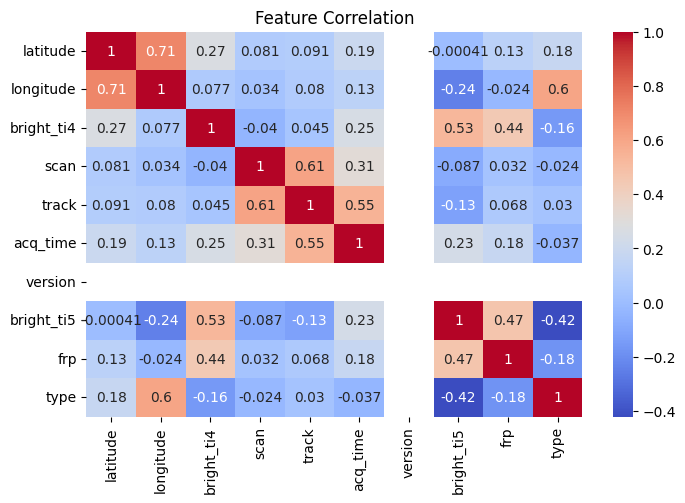

In [ ]:
# Check missing values
print(df.isnull().sum())

# Basic data types and structure
df.info()

# Plot correlation
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
# Filter relevant and complete rows
reg_data = df[['frp', 'bright_ti4', 'bright_ti5']].dropna()
X = reg_data[['bright_ti4', 'bright_ti5']]
y = reg_data['frp']

In [ ]:
# === Prepare data for regression ===
reg_data = df[['frp', 'bright_ti4', 'bright_ti5']].dropna()
X = reg_data[['bright_ti4', 'bright_ti5']]
y = reg_data['frp']

In [ ]:
# Add constant for OLS
X_const = sm.add_constant(X)

In [ ]:
# === 1. OLS Linear Regression (statsmodels) ===
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    frp   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1150.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:16:44   Log-Likelihood:                -23682.
No. Observations:                6257   AIC:                         4.737e+04
Df Residuals:                    6254   BIC:                         4.739e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -165.1426      3.847    -42.922      0.0

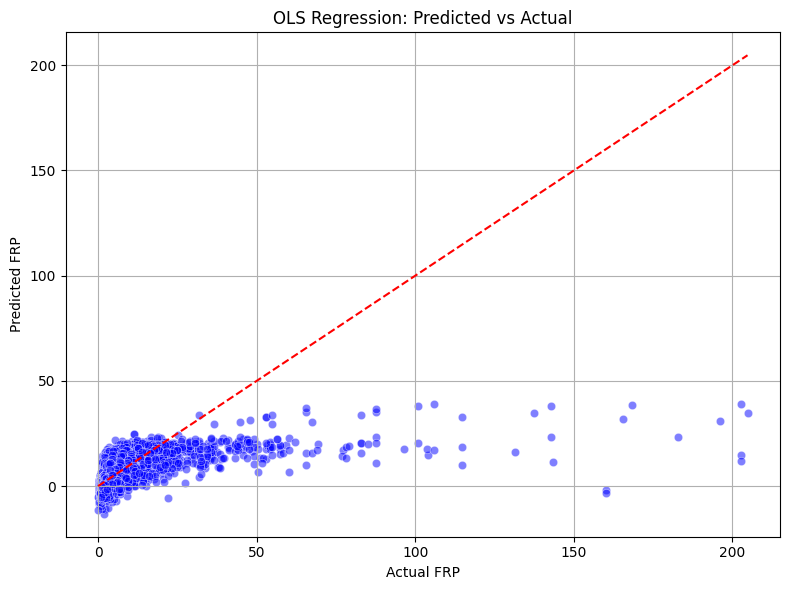

In [ ]:
# Predict with OLS and plot
reg_data['predicted_frp'] = ols_model.predict(X_const)
plt.figure(figsize=(8,6))
sns.scatterplot(x='frp', y='predicted_frp', data=reg_data, alpha=0.5, color="blue")
plt.plot([0, reg_data['frp'].max()], [0, reg_data['frp'].max()], '--', color='red')
plt.xlabel("Actual FRP")
plt.ylabel("Predicted FRP")
plt.title("OLS Regression: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

## Describe the sequential Random Forest model setup, performance metrics, and plot interpretation.

Random Forest Performance (Sequential):
MAE:  3.608
MSE:  89.082
RMSE: 9.438
R2:   0.482


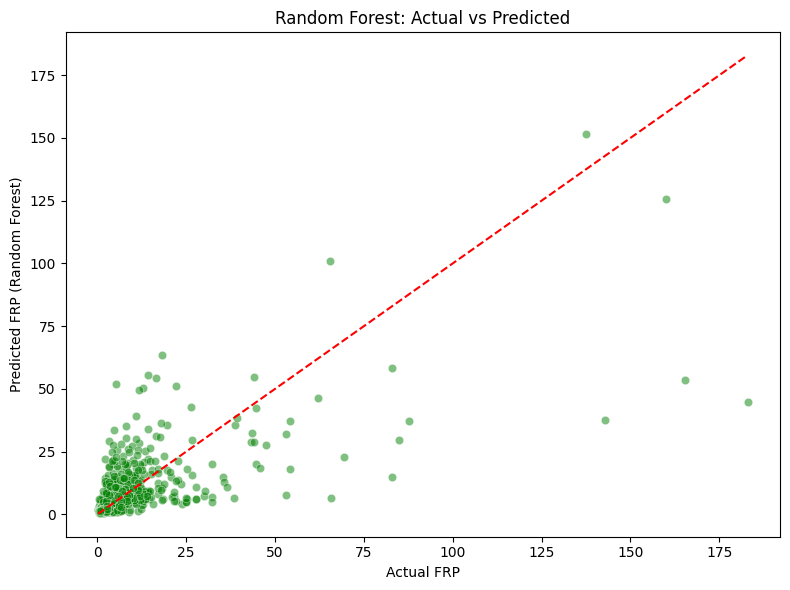

In [ ]:
# === 2. Random Forest Regression (Sequential) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

start_rf_train_sequential = time.time()
rf_model.fit(X_train, y_train)
end_rf_train_sequential = time.time()
rf_train_time_sequential = end_rf_train_sequential - start_rf_train_sequential

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance (Sequential):")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")
print(f"R2:   {r2_score(y_test, y_pred_rf):.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual FRP")
plt.ylabel("Predicted FRP (Random Forest)")
plt.title("Random Forest: Actual vs Predicted")
plt.tight_layout()
plt.show()

## Random Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Define a threshold to categorize FRP values (e.g., median or a domain-specific value)
# Let's use the median FRP as a simple threshold for demonstration
frp_threshold = y_test.median()
print(f"Using median FRP ({frp_threshold:.3f}) as the threshold to categorize High/Not High.")

# Convert actual and predicted continuous values into binary categories
y_test_category = (y_test > frp_threshold).astype(int)
y_pred_rf_category = (y_pred_rf > frp_threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_category, y_pred_rf_category)

print("\nConfusion Matrix:")
print(cm)

Using median FRP (2.550) as the threshold to categorize High/Not High.

Confusion Matrix:
[[518 111]
 [ 89 534]]


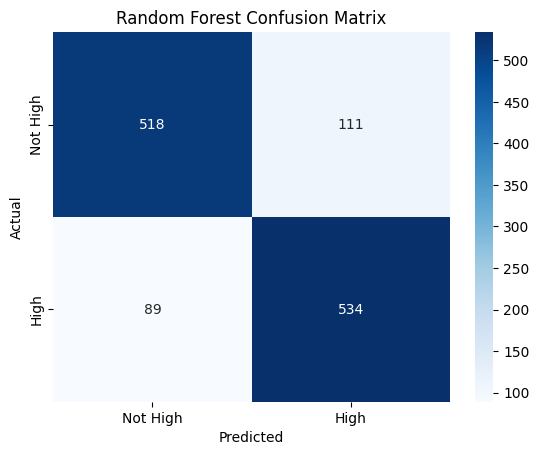

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not High', 'High'], yticklabels=['Not High', 'High'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

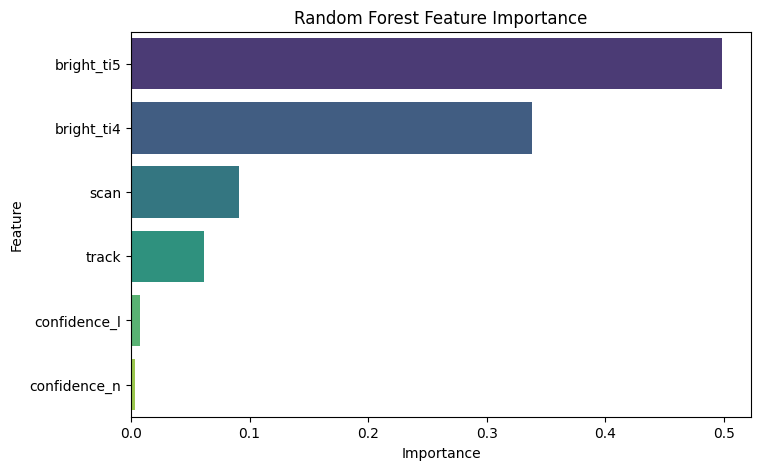

In [ ]:
# === Feature Importance ===
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load with Pandas for regression
df = pd.read_csv("viirs-jpss1_2018_Sweden.csv")

# Prepare data including 'scan', 'track', and 'confidence' for regression
reg_data = df[['frp', 'bright_ti4', 'bright_ti5', 'scan', 'track', 'confidence']].dropna()

# Create dummy variables for the 'confidence' column
reg_data = pd.get_dummies(reg_data, columns=['confidence'], drop_first=True)

# Redefine the feature matrix X
X = reg_data.drop('frp', axis=1)

# Keep the target variable y
y = reg_data['frp']

# Split the data (if not already split) - Added for robustness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor (re-training in this cell)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Added n_jobs=-1 for potential parallel processing
rf_model.fit(X_train, y_train)


importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', palette="viridis", legend=False)
plt.title("Random Forest Feature Importance")
plt.show()

# Add numerical labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

In [ ]:
scores = {
    "Model Name": ["OLS Linear Regression", "Random Forest Regression"],
    "MSE": [ols_model.mse_resid, rf_metrics_seq['MSE']],
    "R²": [ols_model.rsquared, rf_metrics_seq['R2']]
}
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model Name,MSE,R²
0,OLS Linear Regression,113.580225,0.268808
1,Random Forest Regression,89.082037,0.482333


In [ ]:
# === 3. Parallel Processing in ML ===
# 3a. Parallel Linear Regression Prediction
lr_parallel = LinearRegression()

start_train = time.time()
lr_parallel.fit(X_train, y_train)
end_train = time.time()
lr_train_time_sequential = end_train - start_train
print(f"Linear Regression Training Time (Sequential): {lr_train_time_sequential:.3f}s")

start_pred_lr_parallel = time.time()
y_pred_lr_parallel = Parallel(n_jobs=-1)(
    delayed(lr_parallel.predict)(X_test.iloc[i:i+1]) for i in range(len(X_test))
)
end_pred_lr_parallel = time.time()
lr_pred_time_parallel = end_pred_lr_parallel - start_pred_lr_parallel
y_pred_lr_parallel = np.concatenate(y_pred_lr_parallel)

print("Linear Regression Performance (Parallel Prediction):")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_lr_parallel):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr_parallel)):.3f}")
print(f"R2:   {r2_score(y_test, y_pred_lr_parallel):.3f}")

Linear Regression Training Time (Sequential): 0.023s
Linear Regression Performance (Parallel Prediction):
MAE:  4.843
RMSE: 11.353
R2:   0.251


In [ ]:
# 3b. Random Forest with Parallel Training and Prediction
rf_parallel = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

start_rf_train = time.time()
rf_parallel.fit(X_train, y_train)
end_rf_train = time.time()
rf_train_time_parallel = end_rf_train - start_rf_train
print(f"Random Forest Training Time (Parallel): {rf_train_time_parallel:.3f}s")

start_rf_pred_parallel = time.time()
y_pred_rf_parallel = rf_parallel.predict(X_test)
end_rf_pred_parallel = time.time()
rf_pred_time_parallel = end_rf_pred_parallel - start_rf_pred_parallel

print("Random Forest Performance (Parallel):")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_rf_parallel):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_parallel)):.3f}")
print(f"R2:   {r2_score(y_test, y_pred_rf_parallel):.3f}")

Random Forest Training Time (Parallel): 1.413s
Random Forest Performance (Parallel):
MAE:  3.608
RMSE: 9.438
R2:   0.482


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession (if not already created)
# If you have already created one, you can skip this and use the existing 'spark' variable
try:
    spark
except NameError:
    spark = SparkSession.builder.appName("LocalSparkLoading").getOrCreate()

# Load the locally available CSV file into a Spark DataFrame
# Replace 'viirs-jpss1_2018_Sweden.csv' with your file name if it's different
spark_df_local = spark.read.csv("viirs-jpss1_2018_Sweden.csv", header=True, inferSchema=True)

# Show the first few rows and the schema to verify
spark_df_local.show(5)
spark_df_local.printSchema()

+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+-----+--------+----+
|latitude|longitude|bright_ti4|scan|track|  acq_date|acq_time|satellite|instrument|confidence|version|bright_ti5|  frp|daynight|type|
+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+-----+--------+----+
|65.56645| 22.22137|    331.23| 0.4| 0.37|2018-04-01|     126|      N20|     VIIRS|         n|      2|    257.16| 1.82|       N|   2|
|65.56415| 22.22091|     367.0|0.41|  0.6|2018-04-01|     306|      N20|     VIIRS|         h|      2|    267.58|10.87|       N|   2|
|58.38541| 13.82855|     303.5|0.42| 0.38|2018-04-02|     109|      N20|     VIIRS|         n|      2|    267.74| 1.23|       N|   2|
| 58.3821| 13.82693|    297.13|0.43| 0.62|2018-04-02|     249|      N20|     VIIRS|         n|      2|    267.03| 0.76|       N|   2|
|60.13186| 16.18054|    331.71|0.41| 0.37|2018-04-02|    1102|

In [ ]:
df = spark.read.csv("viirs-jpss1_2018_Sweden.csv", header=True, inferSchema=True)
df.show(5)  # Optional: preview


+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+-----+--------+----+
|latitude|longitude|bright_ti4|scan|track|  acq_date|acq_time|satellite|instrument|confidence|version|bright_ti5|  frp|daynight|type|
+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+-----+--------+----+
|65.56645| 22.22137|    331.23| 0.4| 0.37|2018-04-01|     126|      N20|     VIIRS|         n|      2|    257.16| 1.82|       N|   2|
|65.56415| 22.22091|     367.0|0.41|  0.6|2018-04-01|     306|      N20|     VIIRS|         h|      2|    267.58|10.87|       N|   2|
|58.38541| 13.82855|     303.5|0.42| 0.38|2018-04-02|     109|      N20|     VIIRS|         n|      2|    267.74| 1.23|       N|   2|
| 58.3821| 13.82693|    297.13|0.43| 0.62|2018-04-02|     249|      N20|     VIIRS|         n|      2|    267.03| 0.76|       N|   2|
|60.13186| 16.18054|    331.71|0.41| 0.37|2018-04-02|    1102|

In [ ]:
from pyspark.sql.functions import to_date
import pandas as pd  # Required for later steps

# Optional: Ensure acq_date is date type
df = df.withColumn("acq_date", to_date("acq_date"))

# Group by day and count
fires_per_day = df.groupBy("acq_date").count().orderBy("acq_date")

# Convert to pandas for Plotly
fires_pd = fires_per_day.toPandas()
fires_pd['acq_date'] = pd.to_datetime(fires_pd['acq_date'])  # Ensure proper datetime format


In [ ]:
import plotly.express as px

fig = px.line(
    fires_pd,
    x='acq_date',
    y='count',
    title='Number of Fire Detections per Day in Sweden (2018)',
    labels={'acq_date': 'Date', 'count': 'Fire Detections'}
)

fig.update_traces(line=dict(color='firebrick'))
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
# Sample high-confidence fire detections
# Filter for confidence level that indicates high risk (e.g., 'h' or a numerical threshold)
# Assuming 'confidence' is a string column and 'h' means high confidence based on previous analysis
# You might need to adjust the filtering logic based on the actual confidence values and their meaning
sample_df = df.filter(df["confidence"] == "h").limit(1000)

# Convert to pandas for Plotly
# Use 'bright_ti4' or 'bright_ti5' as the color variable
sample_pd = sample_df.select("latitude", "longitude", "bright_ti4").toPandas()

# Plot on a map
fig = px.scatter_geo(
    sample_pd,
    lat='latitude',
    lon='longitude',
    color='bright_ti4',  # Use the corrected column name
    title='High-Confidence Fire Detections in Sweden (2018)',
    color_continuous_scale='OrRd',
    scope='europe'
)

fig.update_layout(template='plotly_white')
fig.show()

In [ ]:
from pyspark.sql.functions import lower, when

# Select relevant columns and drop rows with nulls using the Spark DataFrame
# Use spark_df_local instead of df
clf_data = spark_df_local.select('confidence', 'bright_ti4', 'bright_ti5', 'frp').na.drop()

# Create 'fire_risk' column using Spark SQL functions
clf_data = clf_data.withColumn('fire_risk', when(lower(clf_data['confidence']) == 'h', 1).otherwise(0))

# Select features and target
X_clf = clf_data.select('bright_ti4', 'bright_ti5', 'frp')
y_clf = clf_data.select('fire_risk')

# Display schema and some data to verify
clf_data.printSchema()
clf_data.show(5)

root
 |-- confidence: string (nullable = true)
 |-- bright_ti4: double (nullable = true)
 |-- bright_ti5: double (nullable = true)
 |-- frp: double (nullable = true)
 |-- fire_risk: integer (nullable = false)

+----------+----------+----------+-----+---------+
|confidence|bright_ti4|bright_ti5|  frp|fire_risk|
+----------+----------+----------+-----+---------+
|         n|    331.23|    257.16| 1.82|        0|
|         h|     367.0|    267.58|10.87|        1|
|         n|     303.5|    267.74| 1.23|        0|
|         n|    297.13|    267.03| 0.76|        0|
|         n|    331.71|    280.77| 5.31|        0|
+----------+----------+----------+-----+---------+
only showing top 5 rows



## Evaluate Accuracy,

In [ ]:
# ==imports ==
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import Parallel, delayed
import multiprocessing

In [ ]:
# === Evaluate Accuracy ===
def eval_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# Make predictions with the sequential Linear Regression model
lr_seq = LinearRegression()
lr_seq.fit(X_train, y_train)
y_pred_lr = lr_seq.predict(X_test)

lr_metrics_seq = eval_metrics(y_test, y_pred_lr)
lr_metrics_par = eval_metrics(y_test, y_pred_lr_parallel)
rf_metrics_seq = eval_metrics(y_test, y_pred_rf)
rf_metrics_par = eval_metrics(y_test, y_pred_rf_parallel)

##Prepare DataFrame for plotting R2 Score Comparison

               Model  Processing  Training Time (s)  Prediction Time (s)  \
0  Linear Regression  Sequential           0.022885                  NaN   
1  Linear Regression    Parallel                NaN             4.346637   
2      Random Forest  Sequential           1.885179                  NaN   
3      Random Forest    Parallel           1.413225             0.056375   

   R2 Score  
0  0.251036  
1  0.251036  
2  0.482333  
3  0.482333  


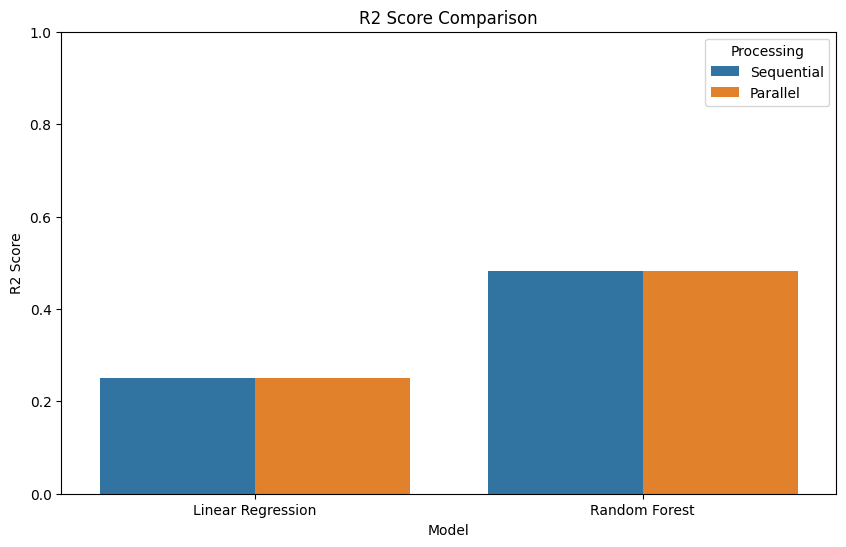

In [ ]:
# === Prepare DataFrame for plotting ===
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'Random Forest', 'Random Forest'],
    'Processing': ['Sequential', 'Parallel', 'Sequential', 'Parallel'],
    'Training Time (s)': [lr_train_time_sequential, None, rf_train_time_sequential, rf_train_time_parallel],
    'Prediction Time (s)': [None, lr_pred_time_parallel, None, rf_pred_time_parallel],  # Only parallel LR prediction time recorded
    'R2 Score': [lr_metrics_seq['R2'], lr_metrics_par['R2'], rf_metrics_seq['R2'], rf_metrics_par['R2']]
})

print(results_df)

# === Plotting R2 Score Comparison ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', hue='Processing', data=results_df)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

## Training Time Comparison

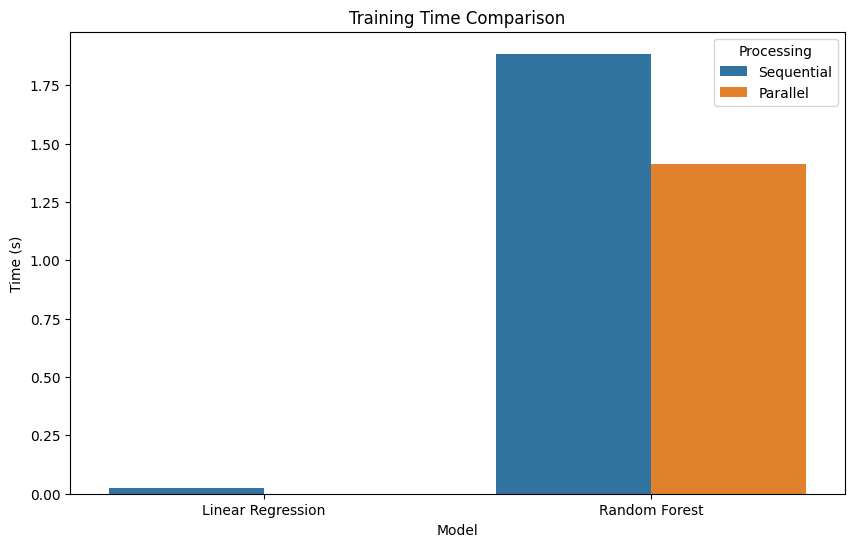

In [ ]:
# === Plotting Training Time Comparison ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (s)', hue='Processing', data=results_df)
plt.title('Training Time Comparison')
plt.ylabel('Time (s)')
plt.show()

## Prediction Time Comparison

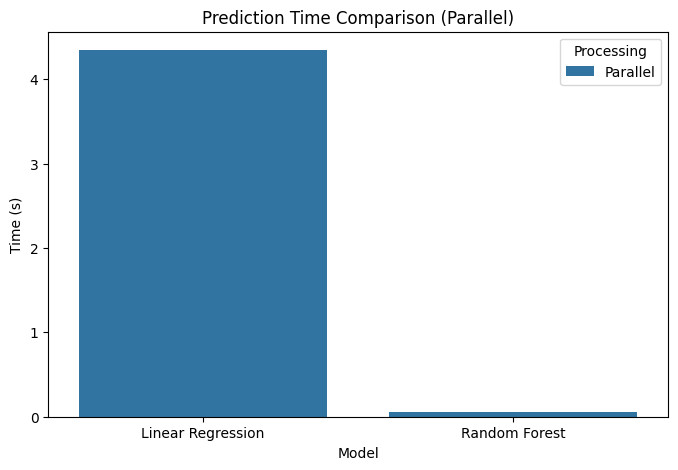

In [ ]:
# === Plotting Prediction Time Comparison ===
prediction_time_df = results_df.dropna(subset=['Prediction Time (s)'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Prediction Time (s)', hue='Processing', data=prediction_time_df)
plt.title('Prediction Time Comparison (Parallel)')
plt.ylabel('Time (s)')
plt.show()

GPU available: False

Linear Regression on CPU

Random Forest on CPU


,Model,Device,Train Time (s),R²,RMSE
0,Linear Regression,CPU,0.003927,0.251036,11.352734
1,Linear Regression,GPU,NaN,NaN,NaN
2,Random Forest,CPU,3.066911,0.482333,9.438328
3,Random Forest,GPU,NaN,NaN,NaN


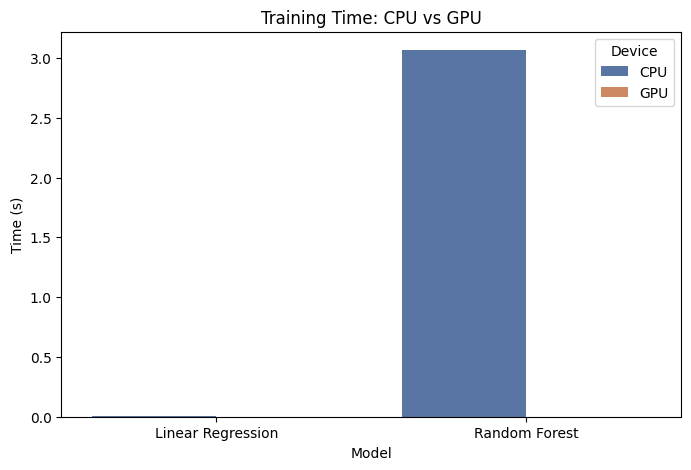

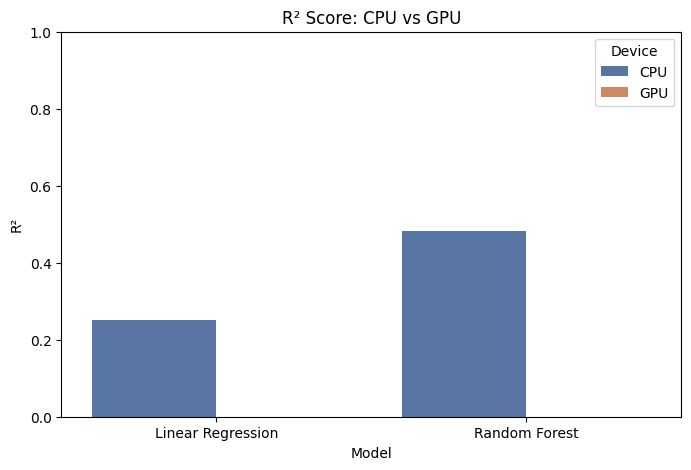

In [ ]:
# === CPU vs GPU Training Time Comparison on VIIRS Sweden Dataset ===

# 0. Imports & GPU check
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load & prepare data
df = pd.read_csv("viirs-jpss1_2018_Sweden.csv")
reg_data = df[['frp','bright_ti4','bright_ti5']].dropna()
X = reg_data[['bright_ti4','bright_ti5']]
y = reg_data['frp']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 2. GPU availability
gpus = tf.config.list_physical_devices('GPU')
gpu_available = len(gpus) > 0
print("GPU available:", gpu_available)

# 3. Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest':    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# 4. Record training times
times = {'Model': [], 'Device': [], 'Train Time (s)': [], 'R²': [], 'RMSE': []}

for name, model in models.items():
    # CPU
    print(f"\n{name} on CPU")
    with tf.device('/CPU:0'):
        t0 = time.time()
        model.fit(X_train, y_train)
        t_cpu = time.time() - t0

    y_pred_cpu = model.predict(X_test)
    r2_cpu  = r2_score(y_test, y_pred_cpu)
    rmse_cpu = np.sqrt(mean_squared_error(y_test, y_pred_cpu))

    times['Model'].append(name)
    times['Device'].append('CPU')
    times['Train Time (s)'].append(t_cpu)
    times['R²'].append(r2_cpu)
    times['RMSE'].append(rmse_cpu)

    # GPU (scikit-learn won’t actually use it, but we wrap anyway)
    if gpu_available:
        print(f"{name} on GPU")
        with tf.device('/GPU:0'):
            # re-init fresh model
            model_gpu = LinearRegression() if name=='Linear Regression' else RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            t0 = time.time()
            model_gpu.fit(X_train, y_train)
            t_gpu = time.time() - t0

        y_pred_gpu = model_gpu.predict(X_test)
        r2_gpu  = r2_score(y_test, y_pred_gpu)
        rmse_gpu = np.sqrt(mean_squared_error(y_test, y_pred_gpu))

        times['Model'].append(name)
        times['Device'].append('GPU')
        times['Train Time (s)'].append(t_gpu)
        times['R²'].append(r2_gpu)
        times['RMSE'].append(rmse_gpu)
    else:
        # placeholder
        times['Model'].append(name)
        times['Device'].append('GPU')
        times['Train Time (s)'].append(np.nan)
        times['R²'].append(np.nan)
        times['RMSE'].append(np.nan)

# 5. Build results DataFrame
results = pd.DataFrame(times)
display(results)

# 6. Plot Training Times
plt.figure(figsize=(8,5))
sns.barplot(data=results, x='Model', y='Train Time (s)', hue='Device', palette='deep')
plt.title("Training Time: CPU vs GPU")
plt.ylabel("Time (s)")
plt.show()

# 7. Plot R² Scores
plt.figure(figsize=(8,5))
sns.barplot(data=results, x='Model', y='R²', hue='Device', palette='deep')
plt.title("R² Score: CPU vs GPU")
plt.ylim(0,1)
plt.show()


## Creating new features from existing data, specifically temporal features from the acq_date column.

**Reasoning**:
The subtask requires creating temporal features from the 'acq_date' column, updating the reg_data and X dataframes to include these features, and displaying the head of the updated reg_data. The steps can be combined into a single code block.



In [ ]:
# Convert PySpark DataFrame to pandas DataFrame
df = df.toPandas()

# 1. Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])

# 2. Extract 'day of year'
df['day_of_year'] = df['acq_date'].dt.dayofyear

# 3. Extract 'month'
df['month'] = df['acq_date'].dt.month

# 4. Update reg_data to include temporal features and drop NaNs
reg_data = df[['frp', 'bright_ti4', 'bright_ti5', 'day_of_year', 'month']].dropna()

# 5. Redefine the feature matrix X
X = reg_data[['bright_ti4', 'bright_ti5', 'day_of_year', 'month']]

# 6. Keep the target variable y
y = reg_data['frp']

# 7. Display the head of the updated reg_data DataFrame
print("Updated reg_data DataFrame with temporal features:")
display(reg_data.head())

Updated reg_data DataFrame with temporal features:


,frp,bright_ti4,bright_ti5,day_of_year,month
0,1.82,331.23,257.16,91,4
1,10.87,367.00,267.58,91,4
2,1.23,303.50,267.74,92,4
3,0.76,297.13,267.03,92,4
4,5.31,331.71,280.77,92,4


## Data preprocessing: data scaling

## Data preprocessing: data scaling

### Subtask:
Apply scaling to the features, which is often important for many ML models and real-time systems.


**Reasoning**:
Apply standard scaling to the training and testing features as required by the subtask.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first 5 rows of the scaled training features
print("First 5 rows of the scaled training features (X_train_scaled):")
display(X_train_scaled[:5])

First 5 rows of the scaled training features (X_train_scaled):


array([[ 0.09149135, -2.29203358],
       [ 1.59397874,  1.91510193],
       [ 1.57825138,  1.8041511 ],
       [-0.46316031, -0.05602452],
       [ 0.39765068,  0.68164856]])

## Simulate real-time prediction setup

Prepare the trained Random Forest model for making predictions on new, incoming data points.

**Reasoning**:
Train a new Random Forest Regressor model named `rf_realtime` on the scaled training data and store it.



In [ ]:
# Train a new Random Forest Regressor model for real-time simulation
rf_realtime = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the scaled training data
rf_realtime.fit(X_train_scaled, y_train)

print("Random Forest model 'rf_realtime' trained on scaled data for real-time simulation.")

Random Forest model 'rf_realtime' trained on scaled data for real-time simulation.


## Simulate real-time prediction

### Subtask:
Write code to simulate receiving new data points one by one and making predictions using the trained model.


**Reasoning**:
Simulate receiving new data points one by one and making predictions using the trained model, following the instructions for this subtask.



In [ ]:
# 1. Select a small subset of the scaled test data (X_test_scaled) to simulate incoming real-time data points.
simulated_realtime_data = X_test_scaled[:10]

# 2. Loop through the selected subset of data points.
print("Simulating real-time predictions:")
for i in range(len(simulated_realtime_data)):
    # 3. For each data point, use the trained rf_realtime model's .predict() method.
    # Reshape the single data point as .predict() expects a 2D input.
    data_point = simulated_realtime_data[i].reshape(1, -1)
    predicted_frp = rf_realtime.predict(data_point)

    # 4. Print the index of the data point and its predicted value.
    print(f"Received data point {i+1}. Predicted FRP: {predicted_frp[0]:.3f}")

    # 5. Introduce a small time delay to simulate data arrival.
    time.sleep(0.1)

print("\nReal-time prediction simulation finished.")

Simulating real-time predictions:
Received data point 1. Predicted FRP: 4.177
Received data point 2. Predicted FRP: 1.251
Received data point 3. Predicted FRP: 5.298
Received data point 4. Predicted FRP: 0.924
Received data point 5. Predicted FRP: 2.511
Received data point 6. Predicted FRP: 2.542
Received data point 7. Predicted FRP: 1.396
Received data point 8. Predicted FRP: 55.509
Received data point 9. Predicted FRP: 1.994
Received data point 10. Predicted FRP: 7.436

Real-time prediction simulation finished.
